# Loading Image Data 加载图像数据

到目前为止，我们一直在使用 artificial datasets，但这些数据集通常不会在实际项目中使用。 实际中，我们大概率会处理全尺寸图像(full-sized images) -- 类似从智能手机相机中拍得的。 在本笔记本中，我们将研究如何加载图像并将其用于训练神经网络。

我们将使用Kaggle提供的[猫和狗照片的数据集](https://www.kaggle.com/c/dogs-vs-cats) 这是几个示例图像：
+ 注意到图像的尺寸是不统一的


<img src='assets/dog_cat.png'>   


我们将使用这个数据集来训练可区分猫和狗的神经网络。 如今，这似乎不难，但是五年前，它对于计算机视觉系统来说是一个严峻的挑战。

## 导入必要数据库
包括 `matplotlib` 和 `torch`, `torchvision` 和 `helper`(自己编写的py文件)

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

## Pytorch 语法1 -- 使用来自 torchvision 的 `ImageFolder` 加载图片   

加载图像数据最简单的方法是使用 `torchvision` ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)) 中的 `datasets.ImageFolder`  
通常，您将像这样使用 `ImageFolder`：   
```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```   
+ 其中参数 `path/to/data` 是数据目录的文件路径   
+ `transform` 是由 `torchvision`中的 `transforms` 模块构建的处理步骤的列表(a list of processing steps)
+ `ImageFolder`希望文件和目录的构造如下:   


```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```  

即要求数据文件按照其所属的类/class都有自己的目录(例如 it's own directory `cat` and `dog`)，则这个方法加载时会使用从目录名称中获取的类来标记(label)图像
+ 例如 图像`123.png`将 be loaded with the class label `cat`.
+ 如果在本地学习这个教程 You can download the dataset already structured like this from here. I've also split it into a training set and test set.
(https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip)

---
## Pytorch 语法2 -- 数据变换1 `transforms.`

先来看我们在前面的笔记本加载数据时有：

```python
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
```
使用 `ImageFolder` 加载图片时有：

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```
即当使用 `ImageFolder` 加载数据时，需要定义一些数据所要做的**转换(transform)**。例如：
+ 例如，文件中图像的size不同，但是我们需要它们都具有相同的size以输入网络进行训练。则可以做的 transform为：
  + **resize** them with `transforms.Resize()`
  + **crop** with `transforms.CenterCrop()` or `transforms.RandomResizedCrop()`
+ **必要**：图像被加载进的格式一般是 `pillow image` 我们还需要使用 `transforms.ToTensor()` **将图像转换为PyTorch张量**   

通常，我们需要把这些transform操作组合到一个pipline中 with `transforms.Compose([])` -- 它 accept 一个transform list 并按顺序运行。举个例子，我们定义一个对数据的transform操作序列：缩放(scale)，然后裁剪(crop)，然后转换为张量:   

```python
transform = transforms.Compose([transforms.Resize(255),   # (255,255)
                                transforms.CenterCrop(244), #(244,244)
                                transforms.ToTensor()])
```

---
## Pytorch 语法3 -- 创建生成器 trainloader
先来看我们在前面的笔记本加载数据时有：   

```python
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
```   

以及在这里，加载`ImageFolder`后，  

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```

您必须将其传递给DataLoader:   

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

```
+ `torch.utils.data.DataLoader()` takes 一个数据集(例如从`ImageFolder`获得的数据集`dataset`）
+ 返回batch的图像和标签(images and the corresponding labels)
在传入dataloader时，设置各种参数，
 + 例如 `batch_size(per loop through)` 大小 
 + 以及是否在每个epoch之后对数据进行shuffle, 我们希望再次使用数据集的时候，读取数据时顺序是不同的

### dataloader 是一个 generator

这里的 dataloader 是一个生成器(generator)(https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/)。 **要从生成器中获取数据**，需要
+ 遍历它(loop through it) -- 将它变成一个 迭代器，实际上是不停调用下面的`next()`
+ 或将其转换为**迭代器(iterator)**并调用`next()`(convert it to an iterator and call `next()`)   


```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```



---
**Exercise:**:  从 `'Cat_Dog_data/train'` 文件夹中加载图像，定义一些转换(transforms)，然后构建数据加载器(build the dataloader):
+ define some `transforms`
+ 创建 image folder: 创建 `dataset`
+ pass image folder to creat a `dataloader`

In [11]:
data_dir = r'D:\Jupyterlab_data\Cat_Dog_data\train' 
# TODO: compose transforms here
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(244),
                                transforms.ToTensor()])
# TODO: create the ImageFolder
dataset = datasets.ImageFolder(data_dir, transform=transform)
# TODO: use the ImageFolder dataset to create the DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

<AxesSubplot:>

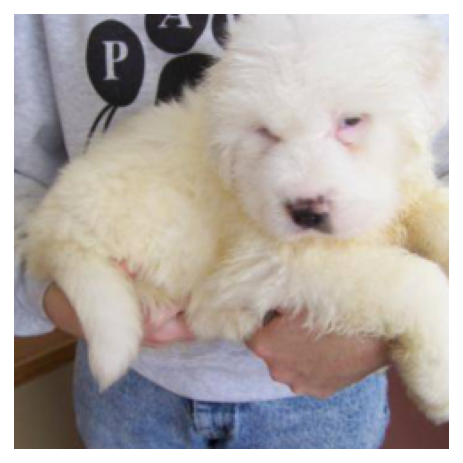

In [12]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

If you loaded the data correctly, you should see something like this (your image will be different):

<img src='assets/cat_cropped.png' width=244>

注：数据集过大，未下载到本地。这个过程完成了基础的图像数据加载(包含简单resize等)过程。在加载数据的时候我们还可以让数据对自己做一些随机处理这成为：数据扩充

## Pytorch 语法4 数据变换2 transforms -- Data Augmentation 数据增强

> 阅读文档了解 `transformas` https://pytorch.org/docs/stable/torchvision/transforms.html
> + [PyTorch 学习笔记（三）：transforms的二十二个方法()](https://zhuanlan.zhihu.com/p/53367135)

训练神经网络的一个常见策略是在输入数据本身中引入随机性(randomness)。例如，我们可以在训练期间**随机旋转，镜像，缩放和/或裁剪图像(randomly rotate, mirror, scale, and/or crop your images during training)**. 这有助于网络的泛化，因为它看到的是相同的图像，但位置不同，大小不同，方向不同等。   

使用`transforms`定义**随机旋转，缩放和裁剪，翻转图像**(randomly rotate, scale and crop, then flip your images)，如下：   

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30), 
                                       transforms.RandomResizedCrop(224), 
                                       transforms.RandomHorizontalFlip(), 
                                       transforms.ToTensor(), 
                                       transforms.Nomalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])])
```   

区分两个：
+ `torchvision.transforms.Resize(size, interpolation=2)`
  + size (sequence or int) – Desired output size. If size is a sequence like (h, w), output size will be matched to this. If size is an int, smaller edge of the image will be matched to this number. i.e, if height > width, then image will be rescaled to (size * height / width, size). 
+ `torchvision.transforms.CenterCrop(size)`
 + size (sequence or int) – Desired output size of the crop. If size is an int instead of sequence like (h, w), a square crop (size, size) is made.

###  关于 normalize images 输入图像__标准化__

传入图像数据时通常还需要使用`transforms.Normalize`对图像进行标准化(normalize)。向 `transforms.Normalize()` 传入
+ 均值列表(a list of means)
+ 和标准差列表(a list of standard deviations)   

然后将颜色通道标准化/归一化(the color channels are normalized)，如下所示   

什么是图像normalize？例如对于任意颜色通道，normalize就是：

$$
\rm input[channel] = \frac{(input[channel] - mean[channel])}{std[channel]}
$$   

+ 图像值(input[channel])减去平均值：**中心化**(centers the data around 0)
+ 再除以图像的标准差std将值压缩到-1到1之间：归一化
+ **标准化/归一化/normalize有助于使网络工作权重保持接近零，从而使反向传播更加稳定。 如果没有规范化，网络将往往无法学习**   

你可以在此处找到所有可用转换的列表(the available transforms here)(http://pytorch.org/docs/0.3.0/torchvision/transforms.html)。 但是，在这里测试时，希望使用未更改的图像（除非您需要以相同的方式进行标准化）。 因此，对于验证/测试图像，通常只需要调整大小和裁剪即可。

---
**Exercise:** 为下面的训练数据和测试数据定义转换(transforms)。现在先不要标准化。
+ [1]设置transforms：随机中心化裁剪224x224, 随机旋转30度，随机反转等，
  + 对于训练数据做数据增强[data augumentation]
  + 对于测试数据**不要** data augumentation
+ [2]读取数据集 dataset
+ [3]创建生成器

In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
#1 为训练数据和测试数据定义transforms：随机中心化裁剪224x224, 随机旋转30度，随机反转等，
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


#2  Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#3
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'Cat_Dog_data/train'

In [ ]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

Your transformed images should look something like this.

<center>Training examples:</center>
<img src='assets/train_examples.png' width=500px>

<center>Testing examples:</center>
<img src='assets/test_examples.png' width=500px>

至此，你应该已经能够加载数据（例如从kaggle下载的数据包）以进行训练和测试。    
现在，我们应该尝试建立一个可以对这个数据集中的猫和狗进行分类的网络。 相比于MNIST和Fashion-MNIST数据集，这比以前要复杂得多。
+ 实际上，无论网络的深度如何，使用像以前一样的全连接网络可能都无法work

因为如我们所见，这些图像是彩色的，这些图像具有三个颜色通道(three color channels)，并且具有更高的分辨率(前面处理都是28x28的tiny图像)。在下一节，我将学习**如何使用一个预先训练好的网络(a pre-trained network )来构建一个可以实际解决这个问题的模型**

[可选练习]编写神经网络尝试对这个数据集分类

In [1]:
# Optional TODO: Attempt to build a network to classify cats vs dogs from this dataset